In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import oceanspy as ospy
ecco = ospy.open_oceandataset.from_catalog('ECCO')

# This is not necessary. It is certainly faster if you have maskU and maskV at hand, say from the shared notebook/analytical folder. 
# ecco._ds['maskU'] = ecco._ds['maskC']
# ecco._ds['maskU'].values = np.load('maskU.npy')
# ecco._ds['maskV'] = ecco._ds['maskC']
# ecco._ds['maskV'].values = np.load('maskV.npy')

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid


In [3]:
import OceInterp as oi

Creating new weight function, the first time is going to be slow
Creating new weight function, the first time is going to be slow
Creating new weight function, the first time is going to be slow
Creating new weight function, the first time is going to be slow
Creating new weight function, the first time is going to be slow


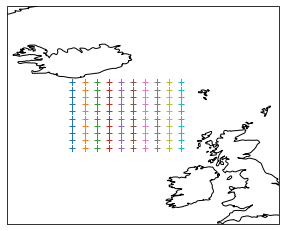

(100,)

In [4]:
import cartopy.crs as ccrs
# change the number of particles here
N = int(1e2)
# change the vertical depth of the particles here
levels = np.array([-10])
sqrtN = int(np.sqrt(N))
x = np.linspace(-19,-9,sqrtN)
y = np.linspace(63,57,sqrtN)

x,y = np.meshgrid(x,y)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.plot(x,y,'+')
ax.coastlines()
ax.set_xlim([-25,0])
ax.set_ylim([50,70])
plt.show()

small_shape = x.shape
x = x.ravel()
y = y.ravel()

x,z = np.meshgrid(x,levels)
y,z = np.meshgrid(y,levels)

x = x.ravel()
y = y.ravel()
z = z.ravel()

# t = np.array([np.datetime64('2000-01') for i in range(len(x))])
# t = (t-od._ds['time'][0].values).astype(float)
start_time = '1998-12-15'
t = (np.array([np.datetime64(start_time) for i in x])
     -np.datetime64('1970-01-01'))/np.timedelta64(1, 's')

t.shape

In [5]:
help(oi.OceInterp)

Help on function OceInterp in module OceInterp.OceInterp:

OceInterp(od, varList, x, y, z, t, kernelList=None, lagrangian=False, lagrange_kwarg={}, update_stops='default', return_in_between=True, return_pt_time=True, **kernel_kwarg)



In [6]:
[s,[u,v],eta,mask] = oi.OceInterp(ecco._ds,['SALT',['UVELMASS','VVELMASS'],'ETAN','maskC'],x,y,z,t)

Creating new weight function, the first time is going to be slow
Creating new weight function, the first time is going to be slow


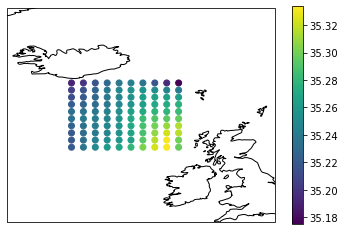

In [7]:
ax = plt.axes(projection = ccrs.PlateCarree())
c = ax.scatter(x,y,c = s)
ax.coastlines()
ax.set_xlim([-25,0])
ax.set_ylim([50,70])
plt.colorbar(c)

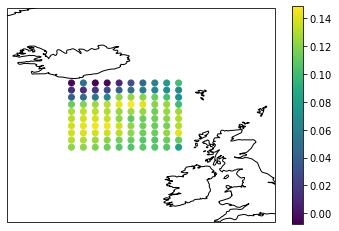

In [8]:
ax = plt.axes(projection = ccrs.PlateCarree())
c = ax.scatter(x,y,c = u)
ax.coastlines()
ax.set_xlim([-25,0])
ax.set_ylim([50,70])
plt.colorbar(c)

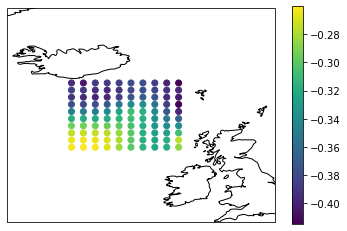

In [9]:
ax = plt.axes(projection = ccrs.PlateCarree())
c = ax.scatter(x,y,c = eta)
ax.coastlines()
ax.set_xlim([-25,0])
ax.set_ylim([50,70])
plt.colorbar(c)

In [10]:
start_time = '1998-12-15'
end_time = '1998-09'

t_bnds = np.array([
    np.datetime64(start_time)-np.datetime64('1970-01-01'),
    np.datetime64(  end_time)-np.datetime64('1970-01-01')
])/np.timedelta64(1, 's')

In [11]:
t_bnds

array([9.13680e+08, 9.04608e+08])

In [12]:
stops,[s,raw,lat,lon] = oi.OceInterp(ecco._ds,
                                 ['SALT','__particle.raw','__particle.lat','__particle.lon'],
                                 x,y,z,t_bnds,
                                lagrangian = True,
                                     return_pt_time = True,# this is actually default to be True
                                    )

creating maskWvel, this is going to be slow!

1998-12-01T06:00:00
100 left 98 left 94 left 75 left 27 left 8 left 2 left 
1998-10-31T18:00:00
100 left 100 left 95 left 83 left 56 left 21 left 5 left 1 left 1 left 
1998-10-01T06:00:00
100 left 95 left 67 left 39 left 13 left 3 left 
1998-09-01T00:00:00
100 left 99 left 81 left 38 left 5 left 3 left 

In [13]:
stops

(912492000.0, 909856800.0, 907221600.0, 904608000.0)

(30.0, 70.0)

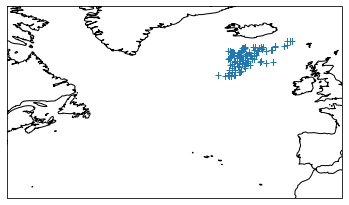

In [14]:
ax = plt.axes(projection = ccrs.PlateCarree())
ax.plot(lon[-1],lat[-1],'+')
ax.coastlines()
ax.set_xlim([-70,0])
ax.set_ylim([30,70])

(30.0, 70.0)

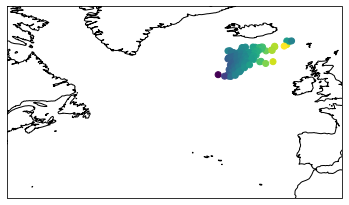

In [15]:
ax = plt.axes(projection = ccrs.PlateCarree())
ax.scatter(lon[-1],lat[-1],c = s[-1])
ax.coastlines()
ax.set_xlim([-70,0])
ax.set_ylim([30,70])

In [16]:
raw

## other classes
### 1. kernel object

In [17]:
KnW = oi.kernelNweight.KnW

In [18]:
default = KnW()
dz_kernel = KnW(vkernel = 'dz')
dx2_kernel = KnW(hkernel = 'dx',h_order = 2,inheritance = [[0,1,2,3,4,5,6,7,8]],tkernel = 'linear')
dt_kernel = KnW(tkernel = 'dt')

Creating new weight function, the first time is going to be slow


In [19]:
output = oi.OceInterp(ecco._ds,{'SALT':dz_kernel,('UVELMASS','VVELMASS'):(dx2_kernel,dt_kernel)},x,y,z,t)

result will be in the order of ['SALT', ('UVELMASS', 'VVELMASS')]


In [20]:
[dsdz,[d2udx2,dvdt]] = output

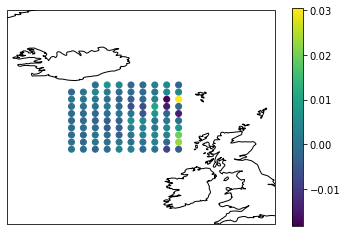

In [21]:
ax = plt.axes(projection = ccrs.PlateCarree())
c = ax.scatter(x,y,c = d2udx2)
ax.coastlines()
ax.set_xlim([-25,0])
ax.set_ylim([50,70])
plt.colorbar(c)